After developing code to play Addition War and perform descriptive analysis using NumPy functionality, I realized that it's a bit inefficient to store all of the results in separate arrays. Now, I have utilized pandas to store and analyze the results of our simulated gameplay.

Before doing so, here are a few enhancements to the previously created 'play' function:
* Added the capability to track the number of ties for each game. THis accounts not only the ties that occur at the beginning of a round, but any additional ties that occur during a tie breaker.
* Added the capability to track the largest total won during a round in a given game, which could occur in a standard round (with no ties) or a tiebreaker round (with one or more ties).
* Added the capability to play multiple games within the function, using a new argument games (equals 1 by default). The function tracks the following statistics for each game, stored in a dictionary:
    * Initial totals (i.e., sum of card values for initially dealt hands) for player 1 and player 2, respectively
    * Number of ties during gameplay
    * Maximum round total won (i.e., maximum sum of card values won during a round, potentially including tiebreakers)
    * Final totals (i.e., sum of card values after completing gameplay) for player 1 and player 2, respectively

The performance of the function has been demonstrated for 1-game (games = 1) and 5-game samples (games = 5), and display the resultant dictionaries for each case.

In [1]:
import numpy as np
import pandas as pd

cards = list(range(1,14)) * 4 # Generating cards with values from 1 to 13. Multiplying by 4 for all suits.
print(cards) # full deck generated

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [2]:
def deal(): # defining deal function
    np.random.shuffle(cards) # shuffling all cards
    Player1 = cards[0:26] # handing 26 cards to Player 1
    Player2 = cards[26:53] # handing 26 cards to Player 2
    hand = (Player1, Player2) # making a tuple of the two lists
    return hand # returning tuple

In [3]:
def play(games = 1): # defining game function
    stats_dict = {} # final dictionary that is returned
    
    for i in range(games): # looping over n games
        Wins_P1 = [] # to store points won by Player 1 in a particular round
        Wins_P2 = [] # to store points won by Player 2 in a particular round
        tie_flag = 0 # to check if previous round was a tie or not
        total_tie_sum = 0 # to take total sum carried over in case of ties
        tie_counter = 0 # to count number of ties in a game
        game_number = i+1 # since game number starts from 1
        Deal2 = deal() # dealing cards
        
        # print('Player 1 has the cards:\n', Deal[0])
        # print('\nPlayer 2 has the cards:\n',Deal[1])
        
        InitTotal_P1 = np.sum(Deal2[0]) # sum of all cards initially handed to Player 1
        InitTotal_P2 = np.sum(Deal2[1]) # sum of all cards initially handed to Player 2
    
        while (len(Deal2[0])>0 and len(Deal2[1])>0): # while Player 1 and 2 have cards
            card1_Player1 = Deal2[0].pop(0) # getting 1st card for Player 1
            card2_Player1 = Deal2[0].pop(0) # getting 2nd card for Player 1
        
            card1_Player2 = Deal2[1].pop(0) # getting 1st card for Player 2
            card2_Player2 = Deal2[1].pop(0) # getting 2nd card for Player 2
        
            sum_Player1 = card1_Player1 + card2_Player1 # taking sum of values of cards of Player 1
            sum_Player2 = card1_Player2 + card2_Player2 # taking sum of values of cards of Player 2
        
            if sum_Player1 > sum_Player2: # if sum of values of cards of Player 1 > sum of values of cards of Player 2
                if tie_flag == 0: # if previous round was not tie
                    Wins_P1.append(sum_Player1 + sum_Player2) # points won by Player 1 in case of no tie
            
                elif tie_flag == 1: # in case previous round was a tie
                    Wins_P1.append(sum_Player1 + sum_Player2 + total_tie_sum) # points won by Player 1 in case of tie
                    tie_flag = 0 # breaking the tie
                    total_tie_sum = 0 # removing residual tie
            
            elif sum_Player2 > sum_Player1: # if sum of values of cards of Player 2 > sum of values of cards of Player 1
                if tie_flag == 0: # if previous round was not tie
                    Wins_P2.append(sum_Player1 + sum_Player2) # points won by Player 1 in case of no tie
            
                elif tie_flag == 1: # in case previous round was a tie
                    Wins_P2.append(sum_Player1 + sum_Player2 + total_tie_sum) # points won by Player 1 in case of tie
                    tie_flag = 0 # breaking the tie
                    total_tie_sum = 0 # removing residual tie
            
            elif sum_Player2 == sum_Player1: # in case of tie
                tie_flag = 1 # changing tie indicator to 1
                tie_counter += 1 # increasing number of ties by 1
                tie_sum = sum_Player1 + sum_Player2 # residual sum is sum of values of cards of both players
                total_tie_sum += tie_sum # adding to total tie sum, takes care of scenarios where there are continous ties
        
        Round_totals = Wins_P1 + Wins_P2 # concatenating winning total of each round
        # creating final dictionary to be returned. Key is game number and each of the stats are the values
        stats_dict[game_number] = InitTotal_P1,InitTotal_P2, tie_counter, max(Round_totals), np.sum(Wins_P1), np.sum(Wins_P2)

    return stats_dict

In [4]:
single_game = play() # playing 1 game
pd.DataFrame.from_dict(single_game, orient='index',
                       columns = ['Player 1 Initial Total','Player 2 Initial Total','Number of ties',
                                              'Maximum Round Total Won','Player 1 Final Total','Player 2 Final Total'])
# converting dictionary into pandas dataframe

,Player 1 Initial Total,Player 2 Initial Total,Number of ties,Maximum Round Total Won,Player 1 Final Total,Player 2 Final Total
1,183,181,0,47,154,210


In [5]:
single_game # displaying the output (it is a dictionary object with game number as key and stats measures as values)

{1: (183, 181, 0, 47, 154, 210)}

In [6]:
five_game = play(games = 5) # playing 5 games and outputting
pd.DataFrame.from_dict(five_game, orient='index',
                       columns = ['Player 1 Initial Total','Player 2 Initial Total','Number of ties',
                                              'Maximum Round Total Won','Player 1 Final Total','Player 2 Final Total'])

,Player 1 Initial Total,Player 2 Initial Total,Number of ties,Maximum Round Total Won,Player 1 Final Total,Player 2 Final Total
1,201,163,2,70,291,73
2,201,163,0,38,200,164
3,195,169,1,57,163,201
4,191,173,2,48,188,142
5,184,180,0,38,172,192


In [7]:
thousand_game = play(games = 1000) # simulating 1000 games
thousand_result = pd.DataFrame.from_dict(thousand_game, orient='index',
                  columns = ['Player 1 Initial Total','Player 2 Initial Total','Number of ties',
                                'Maximum Round Total Won','Player 1 Final Total','Player 2 Final Total'])

thousand_result.head(10) # first 10 results

,Player 1 Initial Total,Player 2 Initial Total,Number of ties,Maximum Round Total Won,Player 1 Final Total,Player 2 Final Total
1,186,178,0,41,212.0,152
2,190,174,1,60,227.0,137
3,163,201,1,72,113.0,251
4,175,189,3,63,197.0,167
5,185,179,1,56,211.0,153
6,175,189,0,45,199.0,165
7,187,177,2,62,166.0,198
8,193,171,2,53,182.0,150
9,183,181,1,41,173.0,191
10,180,184,2,56,180.0,156


Adding a new columns 'Outcome', 'Winning Total' and 'Losing Total' to keep track of winner and loser final totals of each game

In [8]:
thousand_result.loc[thousand_result['Player 1 Final Total'] > thousand_result['Player 2 Final Total'],'Outcome'] = 'Player 1 Wins'
thousand_result.loc[thousand_result['Player 1 Final Total'] < thousand_result['Player 2 Final Total'],'Outcome'] = 'Player 2 Wins'
thousand_result.loc[thousand_result['Player 1 Final Total'] == thousand_result['Player 2 Final Total'],'Outcome'] = 'Tie Game'

thousand_result.loc[thousand_result['Player 1 Final Total'] > thousand_result['Player 2 Final Total'],'Winning_Total'] = thousand_result['Player 1 Final Total']
thousand_result.loc[thousand_result['Player 1 Final Total'] < thousand_result['Player 2 Final Total'],'Winning_Total'] = thousand_result['Player 2 Final Total']
thousand_result.loc[thousand_result['Player 1 Final Total'] == thousand_result['Player 2 Final Total'],'Winning_Total'] = np.nan

thousand_result.loc[thousand_result['Player 1 Final Total'] < thousand_result['Player 2 Final Total'],'Losing_Total'] = thousand_result['Player 1 Final Total']
thousand_result.loc[thousand_result['Player 1 Final Total'] > thousand_result['Player 2 Final Total'],'Losing_Total'] = thousand_result['Player 2 Final Total']
thousand_result.loc[thousand_result['Player 1 Final Total'] == thousand_result['Player 2 Final Total'],'Losing_Total'] = np.nan

In [9]:
thousand_result.head(10) # first 10 results

,Player 1 Initial Total,Player 2 Initial Total,Number of ties,Maximum Round Total Won,Player 1 Final Total,Player 2 Final Total,Outcome,Winning_Total,Losing_Total
1,186,178,0,41,212.0,152,Player 1 Wins,212.0,152.0
2,190,174,1,60,227.0,137,Player 1 Wins,227.0,137.0
3,163,201,1,72,113.0,251,Player 2 Wins,251.0,113.0
4,175,189,3,63,197.0,167,Player 1 Wins,197.0,167.0
5,185,179,1,56,211.0,153,Player 1 Wins,211.0,153.0
6,175,189,0,45,199.0,165,Player 1 Wins,199.0,165.0
7,187,177,2,62,166.0,198,Player 2 Wins,198.0,166.0
8,193,171,2,53,182.0,150,Player 1 Wins,182.0,150.0
9,183,181,1,41,173.0,191,Player 2 Wins,191.0,173.0
10,180,184,2,56,180.0,156,Player 1 Wins,180.0,156.0


Checking winning frequency and tie games

In [10]:
Outcome_frequency = thousand_result['Outcome'].value_counts().to_dict()
print(Outcome_frequency)

{'Player 1 Wins': 501, 'Player 2 Wins': 496, 'Tie Game': 3}


In [11]:
thousand_result[thousand_result['Outcome']=='Tie Game']

,Player 1 Initial Total,Player 2 Initial Total,Number of ties,Maximum Round Total Won,Player 1 Final Total,Player 2 Final Total,Outcome,Winning_Total,Losing_Total
34,189,175,1,40,182.0,182,Tie Game,NaN,NaN
395,182,182,2,63,182.0,182,Tie Game,NaN,NaN
425,161,203,1,75,182.0,182,Tie Game,NaN,NaN


Getting descriptive statistics for winning total column and displaying the rows in the DataFrame that contain the top 10 winning totals

In [12]:
thousand_result['Winning_Total'].describe()

count    997.000000
mean     224.830491
std       30.767987
min      164.000000
25%      202.000000
50%      220.000000
75%      243.000000
max      364.000000
Name: Winning_Total, dtype: float64

In [13]:
top_winning_total = thousand_result.sort_values(by=['Winning_Total'], ascending = False)
top_winning_total.head(10)

,Player 1 Initial Total,Player 2 Initial Total,Number of ties,Maximum Round Total Won,Player 1 Final Total,Player 2 Final Total,Outcome,Winning_Total,Losing_Total
936,145,219,1,58,0.0,364,Player 2 Wins,364.0,0.0
234,161,203,1,46,22.0,342,Player 2 Wins,342.0,22.0
744,155,209,2,69,23.0,341,Player 2 Wins,341.0,23.0
432,228,136,0,34,339.0,25,Player 1 Wins,339.0,25.0
808,152,212,0,41,37.0,327,Player 2 Wins,327.0,37.0
550,152,212,0,43,43.0,321,Player 2 Wins,321.0,43.0
993,212,152,0,46,321.0,43,Player 1 Wins,321.0,43.0
768,154,210,1,41,44.0,320,Player 2 Wins,320.0,44.0
973,208,156,1,43,319.0,45,Player 1 Wins,319.0,45.0
907,192,172,3,114,315.0,49,Player 1 Wins,315.0,49.0


Calculating the frequency of the number of ties within each game (i.e., the number of rounds in which a tie occurs). Then, calculating the mean maximum round total as a function of the number of ties.

In [14]:
Tie_frequency = thousand_result['Number of ties'].value_counts().to_dict()
Tie_frequency

{0: 491, 1: 381, 2: 105, 3: 19, 4: 3, 5: 1}

In [15]:
relation = thousand_result.groupby('Number of ties', as_index=False)['Maximum Round Total Won'].mean()
relation

,Number of ties,Maximum Round Total Won
0,0,40.454175
1,1,55.120735
2,2,65.266667
3,3,76.842105
4,4,73.000000
5,5,86.000000


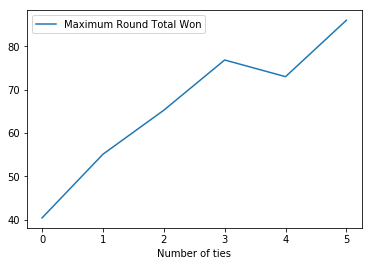

In [18]:
lines = relation.plot.line(x='Number of ties', y='Maximum Round Total Won')

We observe that there is a fairly linear relationship between number of ties and mean maximum round total won.